## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3., 3., size=100)  # 均匀分布
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

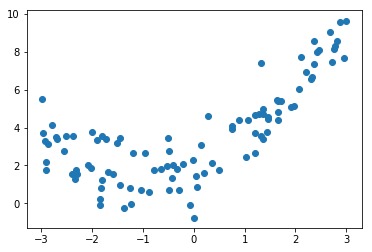

In [3]:
plt.scatter(x,y)
plt.show()

## 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

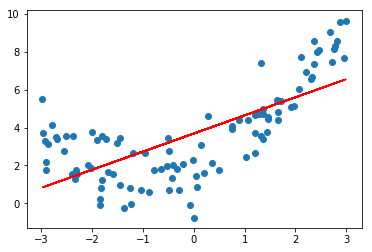

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(x, y_predict, color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def PolynomialRegression(degrees):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degrees)),
        ("std_sclar", StandardScaler()),
         ("lin_reg", LinearRegression())
    ])

In [10]:
poly2_reg = PolynomialRegression(degrees=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_sclar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [11]:
y2_predict = poly2_reg.predict(X)

In [12]:
mean_squared_error(y, y2_predict)

1.0987392142417856

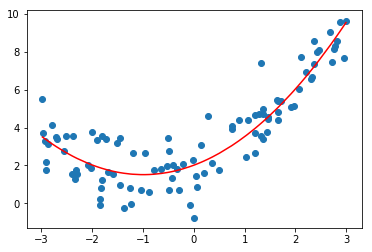

In [13]:
plt.scatter(x,y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [14]:
poly10_reg = PolynomialRegression(degrees=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764148

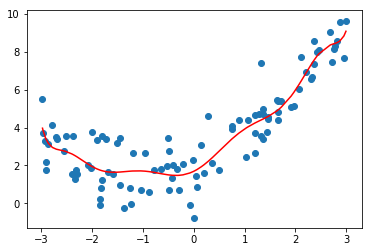

In [15]:
plt.scatter(x,y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [16]:
poly100_reg = PolynomialRegression(degrees=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.7097177265221079

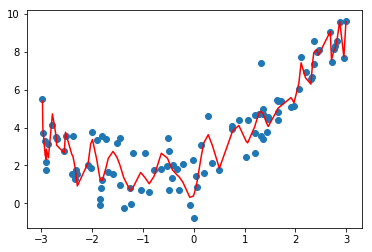

In [18]:
plt.scatter(x,y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

## train test split 的意义

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [21]:
poly2_reg = PolynomialRegression(degrees=2)
poly2_reg.fit(X_train, y_train)

y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.80356410562979

In [22]:
poly10_reg = PolynomialRegression(degrees=10)
poly10_reg.fit(X_train, y_train)

y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150803